In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os

In [2]:
def rotate_line(pp,th):
    a,b,c = pp
    cos = np.cos(th)
    sin = np.sin(th)
    return np.array([np.round(cos*a - sin*b, 9), np.round(sin*a + cos*b, 9), c])

In [3]:
def plot_line(l, lim = 10,color = 'tab:blue'):
    a,b,c = l
    if b != 0:
        X = np.linspace(-lim,lim)
        Y = -(c + a*X)/b
        plt.plot(X,Y, c = color,linewidth = 2)
    else:
        Y = np.linspace(-lim,lim)
        X = -(c + b*Y)/a
        plt.plot(X,Y,c = color)

In [24]:
A = 250

dc = 0.75
symm = 12

N_lines = (2*A + 1)*symm

Lines = np.zeros((N_lines, 3))

In [25]:
idx = 0
th = 2*np.pi/symm
for a in range(-A, A+1):
    aa = 1
    bb = 0
    Lines[idx] = [aa,bb,a + dc]
    idx += 1
    for s in range(1,symm):
        Lines[idx] = rotate_line(Lines[idx - 1], th)
        idx += 1
#Lines

In [26]:
cols = ["r","t"]

fnam_in = "gen_4/B_points.csv"
fnam_in = "gen_5/q4/B_points.csv"
fnam_in = "gen_7/q5/B_min_points.csv"

fold = fnam_in.split(".")[0] + "_lattices"

irr = fnam_in.split("/")[-1][0]
print(fold)

if not os.path.exists(fold):
    print("Creating " + fold)
    os.mkdir(fold)

p = 580e-9

df = pd.read_csv(fnam_in, names = cols, skiprows = 8)
df.head()

df['x'] = df.r*np.cos(df.t*np.pi)
df['y'] = df.r*np.sin(df.t*np.pi)
print(df.shape[0])

gen_7/q5/B_min_points_lattices
200737


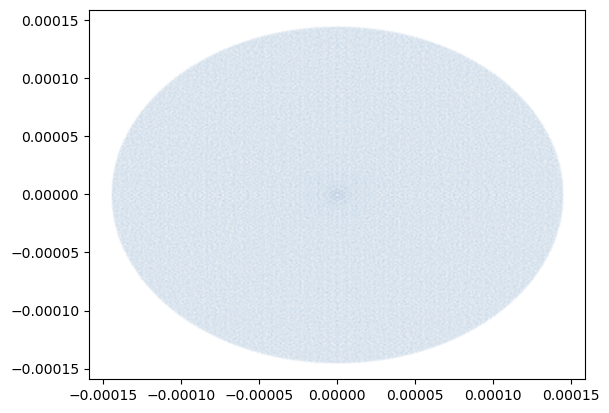

In [27]:
plt.scatter(df.x, df.y, s = 1, alpha = 0.01)

In [28]:
l0 = np.array([0,1,0])
l1 = rotate_line(l0, np.pi/symm + np.pi)
l2 = rotate_line(l0, -np.pi/symm)

(-10.0, 10.0)

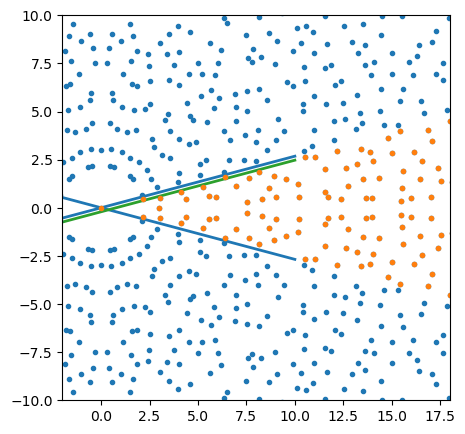

In [29]:
fig = plt.figure(figsize = (5,5))
n_in = 1
df2 = df[(df.t >= -1/symm) & (df.t < 1/symm)]

plot_line(l1)
l3 = np.copy(l1)
l3 += np.array([0,0,-.2])
plot_line(l2)
plot_line(l3, color = 'tab:green')

plt.plot(df.x/p, df.y/p, '.')
plt.plot(df2.x/p, df2.y/p , '.')


lim = 10
#lim = 5e-6
dx = 8
plt.xlim([dx-lim,dx+lim])
plt.ylim([-lim,lim])

In [30]:
l3

array([ 0.25881905, -0.96592583, -0.2       ])

In [31]:
X = df2.x.values/p
Y = df2.y.values/p
NN = len(X)

In [32]:
PP_cut = np.zeros((len(X),3))
PP_cut[:,0] = X
PP_cut[:,1] = Y
PP_cut[:,2] = np.ones(NN)
sLA = np.sign(np.dot(Lines, PP_cut.T))
sLA[sLA == 0] = 1
s = np.sum(sLA, axis = 0)
s.shape

(16729,)

In [33]:
unique, counts = np.unique(s, return_counts=True)

dict(zip(unique, counts))

{12.0: 1, 14.0: 876, 16.0: 5412, 18.0: 691, 20.0: 7113, 22.0: 2542, 24.0: 94}

In [34]:
n_in = 20
dft = df2[s >= n_in]
Nt = dft.shape[0]
print(Nt*symm)

116988


In [35]:
T_out = []
R_out = []
for i in range(Nt):
    tt = dft.t.values[i]
    rr = dft.r.values[i]
    if rr > 0:
        for j in range(symm):
            T_out.append(tt*np.pi + j*np.pi/(symm/2))
            R_out.append(rr)
    else:
        T_out.append(0)
        R_out.append(0)

In [36]:
X_out = R_out*np.cos(T_out)
Y_out = R_out*np.sin(T_out)
df_out = pd.DataFrame(columns = ['x','y'])
df_out.x = X_out
df_out.y = Y_out
num_particles = len(X_out)
rr = 250/2
Area = rr*rr*np.pi

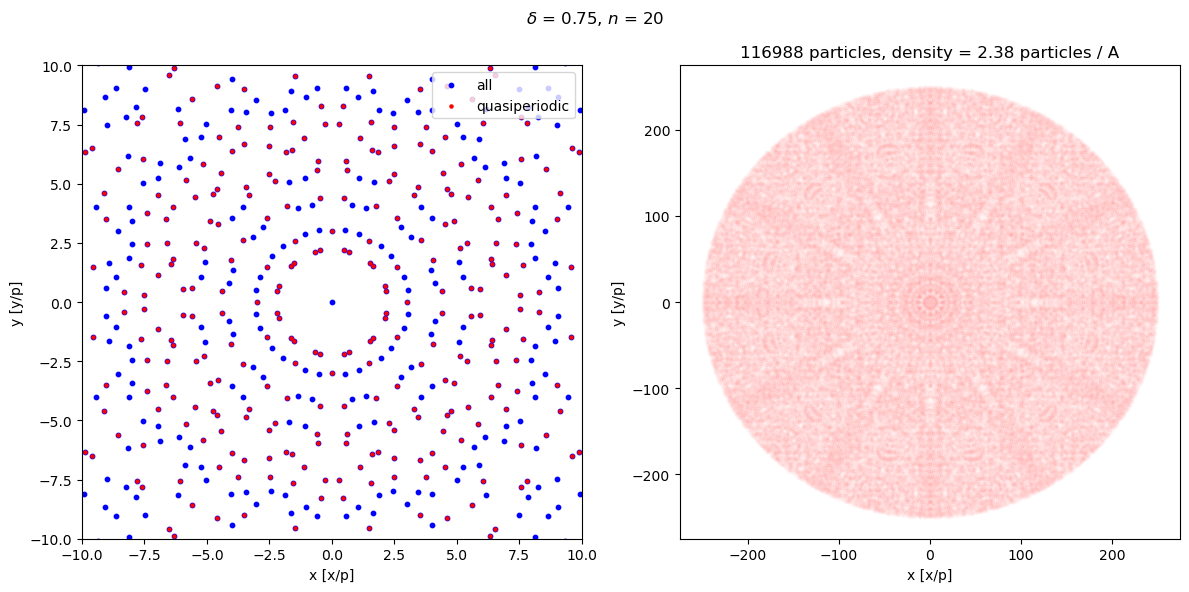

In [37]:
fig, ax = plt.subplots(1,2,figsize = (12,6))

ax[0].scatter(df.x/p, df.y/p, s = 10, color = 'b', label = "all")
ax[0].scatter(df_out.x/p, df_out.y/p, s = 5, color = 'r', label = "quasiperiodic")

ax[0].set_xlim([-10,10])
ax[0].set_ylim([-10,10])
ax[0].set_xlabel('x [x/p]')
ax[0].set_ylabel("y [y/p]")
ax[0].legend(loc='upper right')

ax[1].scatter(df_out.x/p, df_out.y/p, alpha = 0.01,s = 5,color = 'r')#, label = "quasiperiodic")
ax[1].set_xlabel('x [x/p]')
ax[1].set_ylabel("y [y/p]")
ax[1].set_title("{} particles, density = {:.2f} particles / A".format(num_particles, num_particles/Area))
#ax[1].legend(loc='upper right',title = "{} particles".format(dft.shape[0]));
fig.suptitle("$\delta$ = {}, $n$ = {}".format(dc, n_in));
plt.tight_layout()
if df_out.shape[0] > 80000:
    plt.savefig(fold + "/" + "{}_d_{:02d}_n_{}_full.png".format(irr,int(dc*100), int(n_in)))

In [38]:
header = """Symm : 10
kx : 6.28319
ky : 0
kmag : 6.28319
Period : 580
n_in = {}
delta = {}
PARTICLE POSITIONS
""".format(n_in,dc)
print(header)
fnam = "{}_d_{:02d}_n_{}_full.csv".format(irr,int(dc*100), int(n_in))
print(fnam)

Symm : 10
kx : 6.28319
ky : 0
kmag : 6.28319
Period : 580
n_in = 20
delta = 0.75
PARTICLE POSITIONS

B_d_75_n_20_full.csv


In [39]:
if num_particles > 80000:
    with open(fold + "/" + fnam,'w') as file:
        file.write(header)
        df_out.to_csv(file, header=False, index=False)
else:
    print("Too small")